In [27]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

In [28]:
# Load wine quality dataset
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')


In [29]:
# Separate features and target
X = wine_data.iloc[:, :-1]
y = wine_data.iloc[:, -1]

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Initialize base classifiers
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)

In [32]:
# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=svc, n_estimators=50,learning_rate=1, random_state=42)

In [33]:
# Initialize Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=50,learning_rate=1,random_state=42)

In [34]:
# Initialize stacking classifier
estimators = [('svc', svc), ('knn', knn), ('lr', lr)]
stacking = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(random_state=42))

In [35]:
# Train and evaluate classifiers
for clf in [adaboost, gb, stacking]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")


C:\Users\wasee\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier accuracy: 0.40625
GradientBoostingClassifier accuracy: 0.6125


C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier accuracy: 0.5625


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    labels = sorted(y_true.unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
# Initialize classifiers
classifiers = [adaboost, gb, stacking]

C:\Users\wasee\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier accuracy: 0.40625


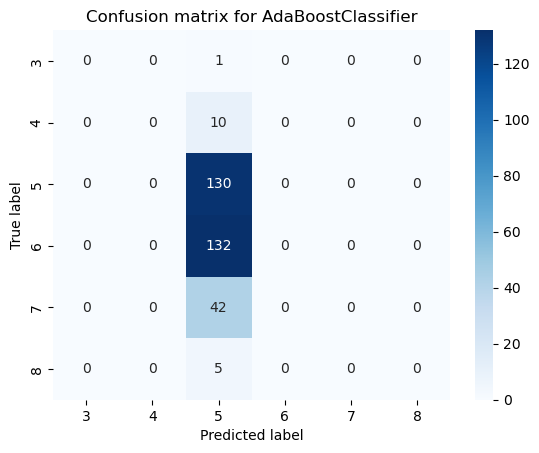

GradientBoostingClassifier accuracy: 0.6125


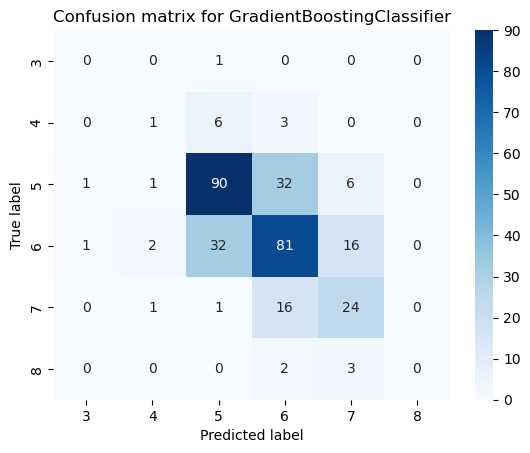

C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier accuracy: 0.5625


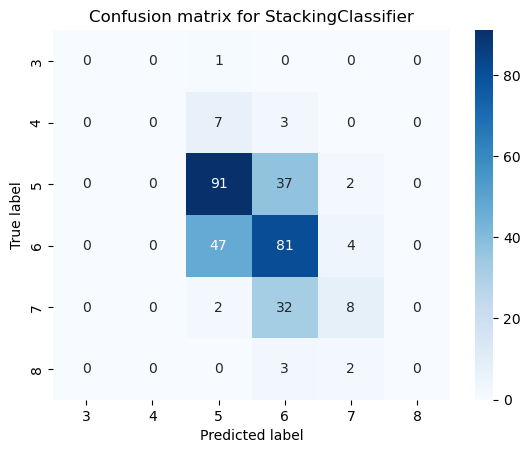

In [38]:
# Evaluate classifiers and plot confusion matrix for each
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")
    plot_confusion_matrix(y_test, y_pred, 
                          title=f"Confusion matrix for {clf.__class__.__name__}")



C:\Users\wasee\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wasee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

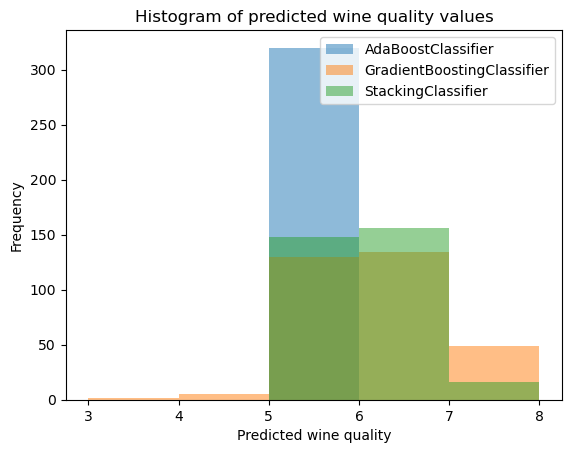

In [39]:

# Plot histogram of predicted wine quality values
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plt.hist(y_pred, bins=range(3, 9),
             alpha=0.5, label=clf.__class__.__name__)
plt.legend()
plt.xlabel("Predicted wine quality")
plt.ylabel("Frequency")
plt.title("Histogram of predicted wine quality values")
plt.show()